### Logistic regression is Classification algorithm 
- Binary or multiclass  classifcation
- It is supervised learning algorithm
- example:
- 1. Mail is spam or not spam
- 2. Image  is cat or the dog
### Code :
- Data Preparation
- Visualization
- Create Train and Test Set
- Create a logistic Regression Model
- Predictions
- Decision Boundary
- How to use SK-learn

In [85]:
# Data - generate
# x belongs R^2 ,ie  2 dimensions , again a basic code
# y has two labels
import numpy as np
import matplotlib.pyplot as plt


In [86]:
np.random.multivariate_normal?

Docstring:
multivariate_normal(mean, cov, size=None, check_valid='warn', tol=1e-8)

Draw random samples from a multivariate normal distribution.

The multivariate normal, multinormal or Gaussian distribution is a
generalization of the one-dimensional normal distribution to higher
dimensions.  Such a distribution is specified by its mean and
covariance matrix.  These parameters are analogous to the mean
(average or "center") and variance (standard deviation, or "width,"
squared) of the one-dimensional normal distribution.

.. note::
    New code should use the
    `~numpy.random.Generator.multivariate_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

Parameters
----------
mean : 1-D array_like, of length N
    Mean of the N-dimensional distribution.
cov : 2-D array_like, of shape (N, N)
    Covariance matrix of the distribution. It must be symmetric and
    positive-semidefinite for proper sampling.
size : int or tuple of 

In [87]:
#first cluster
mean1 = np.array([1,0.5]) 
cov1  = np.array([[1, 0.1], [0.1, 1.2]])
#second cluster
mean2 = np.array([4,5])
cov2  = np.array([[1.2, 0.1], [0.1, 1.3]])
distribution1 = np.random.multivariate_normal(mean1, cov1, 500)
distribution2 = np.random.multivariate_normal(mean2, cov2, 500)


In [88]:
print(distribution1.shape, distribution1)

(500, 2) [[ 5.08996766e-01  2.04974575e+00]
 [ 2.96358845e+00  7.59239148e-01]
 [ 1.15459530e+00 -1.11920927e+00]
 [ 1.05822388e+00 -9.52772712e-01]
 [-1.42661820e+00 -1.91277467e+00]
 [ 2.63315203e-01  3.97750582e-01]
 [ 2.06856559e+00  2.08674143e+00]
 [ 1.96685049e-01 -1.25508558e-01]
 [ 2.57776765e+00 -2.70300157e-02]
 [ 1.63191573e+00  7.19699825e-01]
 [ 3.66222799e+00  1.15931141e+00]
 [ 7.88722875e-01  2.15855433e+00]
 [ 3.15054951e-01  8.70884671e-01]
 [ 2.25807749e-01  1.06657095e+00]
 [ 4.76679977e-01  6.23482375e-01]
 [ 1.68193991e+00  1.94337321e+00]
 [ 1.25878246e+00  2.31553881e-01]
 [ 1.29506042e+00  1.72034886e-02]
 [ 1.06507118e-01 -1.37698039e+00]
 [ 4.24747229e+00  2.21821440e+00]
 [ 3.22389792e-01 -1.91917757e-01]
 [ 1.17409793e+00  2.98173430e-01]
 [ 1.36697010e+00 -3.98837884e-01]
 [ 1.92211072e+00  9.43324427e-01]
 [ 1.39829564e+00  1.35314589e+00]
 [ 2.50674507e+00 -4.79387390e-01]
 [ 9.02359226e-01 -3.16260358e-01]
 [-5.47818692e-01  1.80940572e-01]
 [ 1.726043

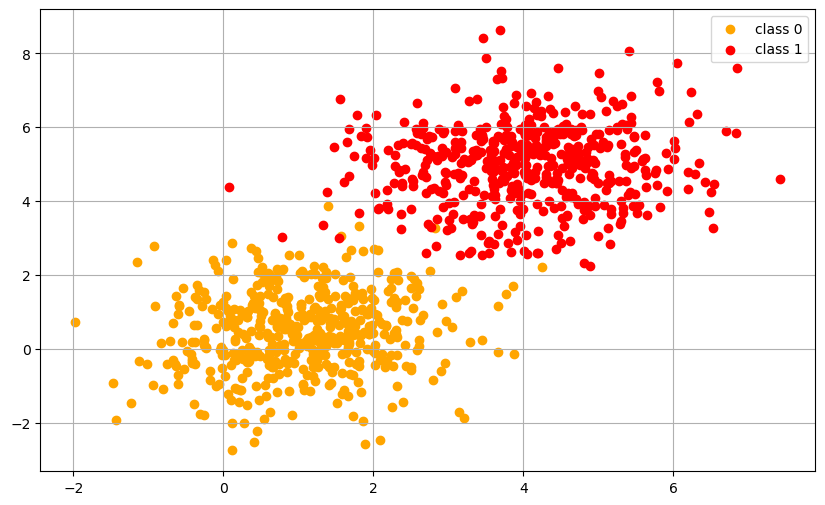

In [89]:
plt.figure(figsize=(10,6))
plt.scatter(distribution1[:,0], distribution1[:,1], color = "orange", label = "class 0")
plt.scatter(distribution2[:,0], distribution2[:,1], color = "red", label = "class 1")
plt.legend()
plt.grid()
plt.show()

#### This data is not ready in form of x---> matrix and y -->> vector
- For that we will convert this data in matrix
- Make matrix of  1000 rows with 2 columns  for X and 1000 rows with 1 column for y where 500 values are 1 and remaining 500 are 0.
- Combine both the matrix for shuffling.
- Than we shuffle all the rows of combined matrix of X and Y ,
- Now on this suffled matrix we can use sklearn for traiining and testing
- After shuffling we can have 80% of data as for train

In [90]:
data = np.zeros((1000,3))



In [91]:
data[:5, :2]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [92]:
data[:500, :2] = distribution1
data[500:, :2] = distribution2
#Here I took distribution 2 as my label 1.
data[:500, -1] = 0 
data[500:, -1] = 1

In [93]:
data

array([[ 0.50899677,  2.04974575,  0.        ],
       [ 2.96358845,  0.75923915,  0.        ],
       [ 1.1545953 , -1.11920927,  0.        ],
       ...,
       [ 3.34601933,  3.61755375,  1.        ],
       [ 4.39258039,  4.97378094,  1.        ],
       [ 3.99845249,  5.31070698,  1.        ]])

### Randomly shuffling the data:

In [94]:
np.random.shuffle(data)

In [95]:
print(data, data.shape) # shuffeld  data

[[ 1.07309108  1.94433007  0.        ]
 [ 0.45804848  2.07649348  0.        ]
 [ 5.43992033  6.85064925  1.        ]
 ...
 [ 3.76635467  5.8001614   1.        ]
 [-0.43655562 -0.13771212  0.        ]
 [ 3.2737534   2.59579847  1.        ]] (1000, 3)


### Divide the data in Train and Test part.

In [96]:
split   = int(0.8*data.shape[0])

X_train = data[:split, 0:2]
X_test  = data[split:, 0:2]

Y_train = data[:split, -1]
Y_test  = data[split:, -1]

In [97]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((800, 2), (200, 2), (800,), (200,))

### Data needs to normalised

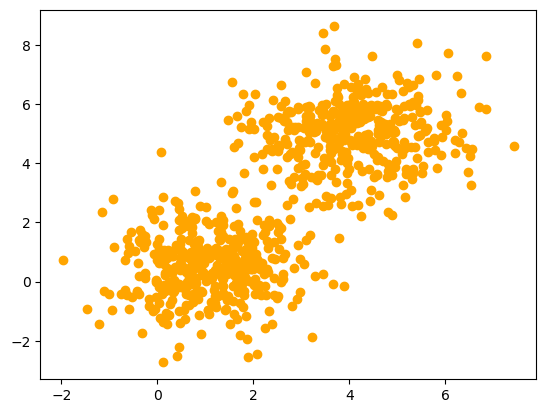

In [98]:
plt.scatter(X_train[:, 0], X_train[:, 1], color = "orange")
plt.show()

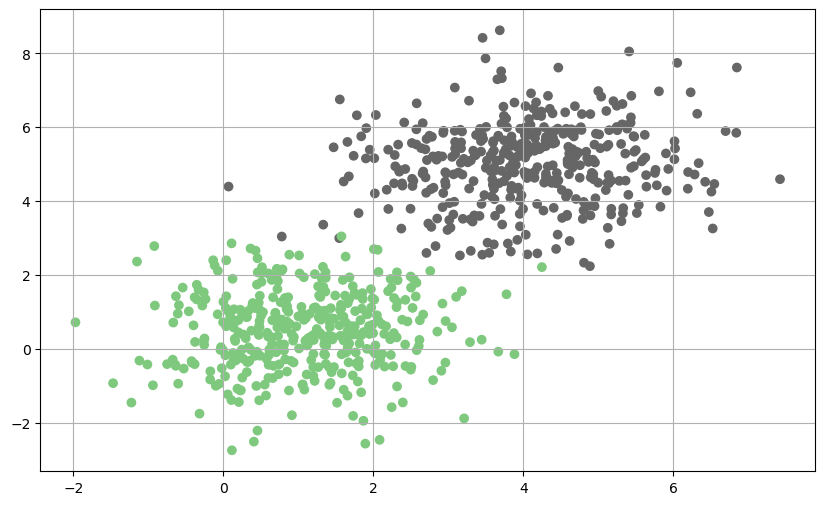

In [99]:
plt.figure(figsize = (10,6))
plt.scatter(X_train[:,0],X_train[:, 1],c= Y_train.reshape((-1,1)),cmap=plt.cm.Accent)
# here Y_train has 2 values 0 and 1
plt.grid()
plt.show()

In [100]:
#Data normalization
mean = X_train.mean()
mean # 2 features but only 1 mean something is horribely wrong here

2.6598525165492033

In [101]:
# we need to find the mean along the rows
mean = X_train.mean(axis = 0)
mean

array([2.55847568, 2.76122935])

In [102]:
std = np.std(X_train, axis = 0)
std

array([1.82293577, 2.50451365])

In [103]:
X_train_normal = (X_train - mean)/ std
X_train_normal

array([[-0.81483101, -0.32617082],
       [-1.15222227, -0.27340074],
       [ 1.58066164,  1.63281997],
       ...,
       [ 1.35345003,  1.06714274],
       [-0.49397466, -1.08247854],
       [ 1.15484467,  0.9143869 ]])

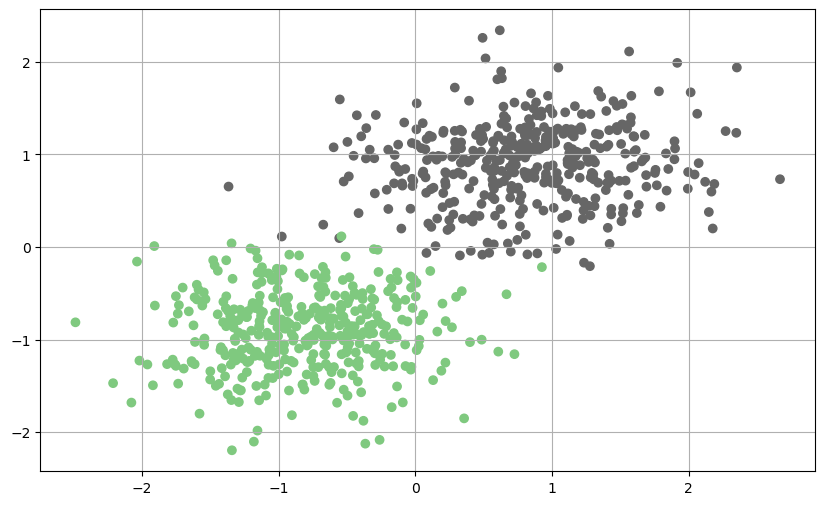

In [104]:
plt.figure(figsize = (10,6))
plt.scatter(X_train_normal[:,0],X_train_normal[:, 1],c = Y_train,cmap=plt.cm.Accent)
plt.grid()
plt.show()
### origin is centralized , shifting of data have taken place 

### Normalization of test data


In [105]:
mean = X_test.mean(axis = 0)
mean 

array([2.4158011 , 2.57677605])

In [106]:
std = X_test.std(axis = 0)
std

array([1.78075897, 2.44270233])

In [107]:
X_test_normal = (X_test - mean)/ std
X_test_normal 

array([[-0.62936125, -1.04784465],
       [-0.43355908, -0.49321647],
       [-0.65529796, -0.74608001],
       [-0.6808758 , -0.137384  ],
       [-0.70132595, -0.69921079],
       [ 1.25369453,  0.6739757 ],
       [-0.98467136, -1.25063305],
       [-0.54857535, -0.94195624],
       [-1.48494444, -1.03443552],
       [ 0.64110316,  0.98738315],
       [-0.76040713, -0.21249167],
       [-0.72837222, -0.98287934],
       [ 1.72773412,  0.65878   ],
       [ 0.90231014,  1.43196712],
       [ 1.05529375,  1.09596513],
       [-0.77191443, -0.56016844],
       [-1.12990249, -0.46878385],
       [ 1.18501413,  1.41774147],
       [ 0.13590213,  1.38988092],
       [-0.12972883,  0.54996682],
       [ 1.16931827,  0.53438999],
       [ 1.16989878,  1.10582983],
       [ 1.37614418,  1.18690128],
       [-1.488238  , -1.04287321],
       [ 1.00290331,  0.25080859],
       [-0.87497499, -0.82094552],
       [ 1.16369454,  1.32679435],
       [ 0.57509236,  0.20917527],
       [-0.87914837,

In [108]:
X_test_normal.std(axis = 0)

array([1., 1.])

### Logistic regression Implementation

In [109]:
# sigmoid  function
def sigmoid(x):
    return 1.0/(1.0 + np.exp(-x))

def hypothesis(X, theta):
    """
    denotes  X - entire array(m, n+1) 1 dummy feature
    theta - np.array(n+1, 1)
    X.theta = (m, 1)
    now take the sigmoid of X.theta
    
    """
    return sigmoid(np.dot(X, theta))

    

In [110]:
def error (X, y , theta):
    """
    Parameters: 
    X =  (m, n+1)
    y = (m, 1)
    theta = (n+1, 1)
    return :
    scale_value = loss (binary cross entropy loss) which is
    (-1/m) summation{(i=1 to m){y(i)log(h(i))+(1-y(i))log(1-h(i)}
    where h(i) is obtained from the hypothesis function
    we will use vectorization which will be efficient:
    (How to do vectorization?) see it in the written notes.
    for vetorization  We have to find the 
    theta- (n+1, 1) in such a way that it returns a hypothesis vector
    After having the theta vector we will have 
    other things are written in the copy
    
     """
    hi = hypothesis(X, theta)
    
    error =  -1*np.mean((y*np.log(hi) + (1-y)*np.log(1- hi)))
    return error

In [145]:
def gradient(X, y, theta):
    """ 
    dj/d0 = for Logistic and Linera regression are same 
    with a sign is positve and  h(0) in Logistics reg is sigmoid
    0j = 0j + lr*(1/m)summation(i = 1 to m){(y(i) - h0(x(i))}X(i)_j
    Now we will use vectorization:
    (X^T)*
    [y1-h1
    .
    .
    ym -hm]
    
    """
    hi = hypothesis(X, theta)
    grad =  -np.dot(X.T, (y - hi))
    m = X.shape[0]
    return grad/m
    
def gradient_descent(X, y, lr = 0.1,  max_itr = 500):
    error_list = []
    n = X.shape[1]
    theta = np.zeros((n, 1))# creating a vector for theta of shape 3 as
# x has 2 features.
    for i in range(max_itr):
        e = error(X, y, theta)
        
        error_list.append(e)
        grad = gradient(X, y, theta)

#update
        theta = theta - lr*grad
    
    return (theta, error_list)
    

In [146]:
X_train.shape

(800, 2)

In [147]:
ones = np.ones((X_train.shape[0], 1))
X_new_train = np.hstack((ones, X_train))
Y_train = Y_train.reshape((-1, 1))#Important thing y must be a column vector

In [148]:
print(X_new_train.shape) 
print(Y_train.shape)

(800, 3)
(800, 1)


In [149]:
theta, error_list = gradient_descent(X_new_train, Y_train)

In [150]:
theta

array([[-3.63577429],
       [ 0.34411926],
       [ 1.22471336]])

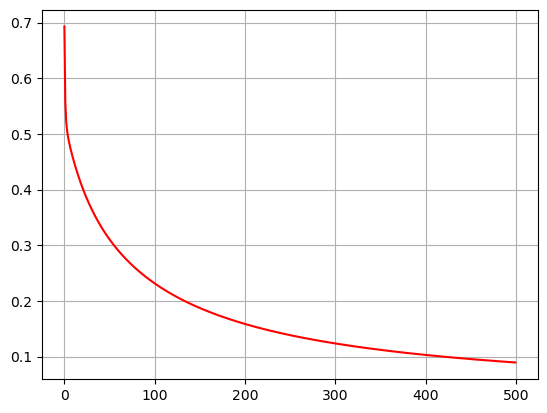

In [151]:
plt.plot(error_list, color = 'red')
plt.grid()
plt.show()

#### Visualize Decision Surface:

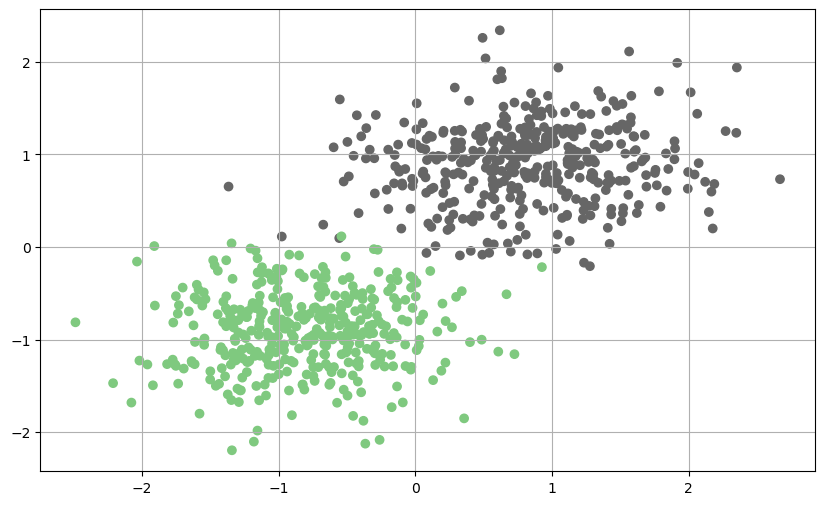

In [152]:
plt.figure(figsize = (10,6))
plt.scatter(X_train_normal[:,0],X_train_normal[:, 1],c= Y_train,cmap=plt.cm.Accent)
plt.grid()
plt.show()

### To plot a line:
- theta(transpose).X = 0
- theta0+ theta1x1 + theta2x2 ... =0
- x2 =(theta_nod - theta_one*x1)/ (theta_two)
- To distinguish between two lines

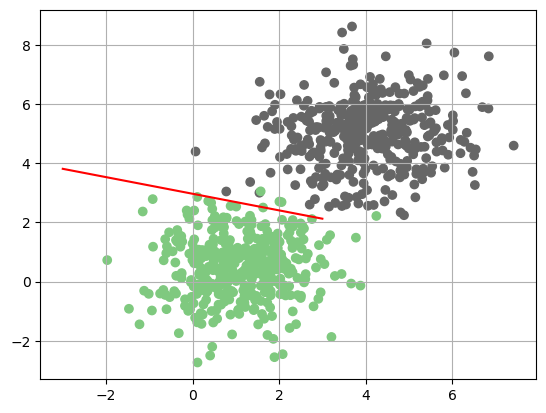

In [153]:
x1 = np.arange(-3, 4)
x2 = -(theta[0] + theta[1]*x1)/theta[2]
plt.scatter(X_train[:,0],X_train[:,1],c= Y_train.reshape((-1,)),cmap=plt.cm.Accent)
plt.plot(x1,x2, color = "red")
plt.grid()
plt.show()

### Prediction and Accuracy

In [154]:
X_new_test = np.hstack((np.ones((X_test.shape[0],1)), X_test))
print(X_new_test.shape)
print(X_new_test[:3, :])

(200, 3)
[[1.         1.29506042 0.01720349]
 [1.         1.64373688 1.37199503]
 [1.         1.24887339 0.75432466]]


In [155]:
def predict(X, theta):
    h = hypothesis(X, theta)#sigmoid output-->>> gives the confidence score
    print(h)
    return
    

In [156]:
predict(X_new_train, theta)
# returns the confidence score , 0.99 -- label =1


[[2.92089800e-01]
 [2.81902987e-01]
 [9.98676682e-01]
 [8.67549695e-01]
 [1.25875627e-02]
 [3.22103571e-01]
 [9.76494971e-01]
 [1.43723196e-01]
 [5.65540741e-02]
 [9.83590198e-01]
 [7.25573584e-03]
 [9.75108115e-01]
 [2.67497566e-02]
 [9.74631921e-01]
 [5.23452155e-02]
 [2.44276151e-01]
 [9.89377911e-01]
 [9.61141999e-01]
 [9.85592596e-01]
 [9.15520560e-01]
 [9.90493944e-01]
 [5.83145973e-02]
 [9.86590423e-01]
 [9.95481813e-01]
 [9.94342899e-01]
 [3.65668123e-01]
 [9.80041861e-01]
 [7.87626842e-02]
 [2.67484770e-01]
 [7.14046268e-01]
 [6.34773735e-01]
 [9.33078430e-01]
 [9.42286477e-01]
 [8.71849203e-02]
 [9.67268921e-01]
 [9.98685176e-01]
 [1.87148511e-02]
 [3.02310167e-01]
 [7.82376681e-02]
 [8.57864605e-01]
 [1.07744262e-01]
 [9.43209512e-01]
 [2.20559984e-03]
 [9.78538533e-01]
 [6.39734574e-01]
 [2.93818954e-03]
 [3.96986227e-02]
 [1.17502364e-02]
 [2.07453085e-03]
 [4.51320623e-02]
 [3.25688102e-01]
 [1.60833517e-02]
 [4.73570139e-02]
 [9.95302009e-01]
 [1.97455752e-02]
 [3.371077

In [157]:
def prediction(X, theta):
    h = hypothesis(X, theta)#sigmoid output-->>> gives the confidence score
    output = np.zeros(h.shape)
    output[h >= 0.5] = 1
    output = output.astype('int')
    return output
prediction(X_new_train, theta)
prediction(X_new_test, theta)

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
    

### Accuracy :
- to the find the accuracy, labels needs to converted into integers

In [158]:
predicted_values_training= prediction(X_new_train, theta)

In [159]:
def accuracy(actual_ylabels, predicted_y):
    
    actual_ylabels = actual_ylabels.astype("int")
    print(np.sum(actual_ylabels == predicted_y))

In [160]:
accuracy(Y_train, predicted_values_training)

796


In [161]:
def accuracy1(actual_ylabels, predicted_y):
    
    actual_ylabels = actual_ylabels.astype("int")
    acc = np.sum(actual_ylabels == predicted_y)/actual_ylabels.shape[0]
    return acc*100

In [162]:
predicted_values_test = prediction(X_new_test, theta)

In [163]:
train_acc = accuracy1(Y_train, predicted_values_training)
test_acc = accuracy1(Y_test, predicted_values_test)
print(train_acc)
print(test_acc)# wrong , because of shape

99.5
9996.0


In [164]:
Y_test.shape, predicted_values_test.shape,predicted_values_training.shape # shape is different 
# that is why broadcasting happens and we are getting the wrong results

((200,), (200, 1), (800, 1))

In [165]:
def accuracy2(actual_ylabels, predicted_y):
    
    actual_ylabels = actual_ylabels.astype("int")
    actual_ylabels = actual_ylabels.reshape((-1,1))
    acc = np.sum(actual_ylabels == predicted_y)/actual_ylabels.shape[0]
    return acc*100

In [166]:
train_acc = accuracy2(Y_train, predicted_values_training)
test_acc =  accuracy2(Y_test, predicted_values_test)
print(train_acc)
print(test_acc)

99.5
97.5


### Logistic Regression Usking Sckit -learn
- logistic regression work only for linear classifcation

In [167]:
from sklearn.linear_model import LogisticRegression

In [168]:
model = LogisticRegression()

In [169]:
model.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [170]:
theta_0 = model.intercept_
theta_one_and_two = model.coef_
print(theta_0, theta_one_and_two)

[-12.10164093] [[1.43268465 3.28655299]]


In [171]:
model.score(X_train, Y_train)

0.995

In [172]:
model.score(X_test, Y_test)

0.985

In [173]:
y_pred = model.predict(X_test)

In [174]:
y_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 0., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1.])

In [175]:
y_pred.shape

(200,)